Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**Speed Comparison**,
Winter Semester 2021/22 (Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np

# Speed comparison between for-loops and linear algebra notation

Repeating the DFT calculation in terms of a matrix operation is recommended in [DFT Fundamentals](../dft/dft_intro.ipynb). This recommendation is based on speed optimization.
The impact of the time of using for-loops to calculate the transpose instead the simple `np.transpose` from `numpy` is evaluated below.

In [2]:
# Program to transpose a matrix using a nested loop
t_for = []
t_npy = []

# increasing matrix shapes
shapes = np.arange(10, 1000, 100)

for s in shapes:
    # generate random matrix
    X = np.random.rand(s, s)
    # empty result matrix
    result = np.zeros((s, s))

    # start for-loop timer
    start = time.process_time()
    # iterate through rows
    for i in range(len(X)):
        # iterate through columns
        for j in range(len(X[0])):
            result[j][i] = X[i][j]
    # save for-loops timer
    t_for.append(time.process_time() - start)

    # start numpy timer
    start = time.process_time()
    np.transpose(X)
    # save numpy timer
    t_npy.append(time.process_time() - start)

t_for = np.array(t_for)
t_npy = np.array(t_npy)

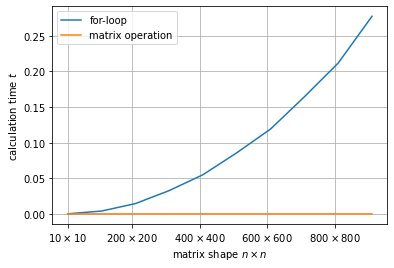

In [4]:
plt.plot(shapes, t_for, "C0-", label="for-loop")
plt.plot(shapes, t_npy, "C1-", label="matrix operation")
plt.xlabel(r"matrix shape $n \times n$")
plt.xticks(
    ticks=[10, 200, 400, 600, 800],
    labels=[
        r"$10 \times 10$",
        r"$200 \times 200$",
        r"$400 \times 400$",
        r"$600 \times 600$",
        r"$800 \times 800$",
    ],
)
plt.ylabel(r"calculation time $t$")
plt.legend()
plt.grid(True)

Based on the plot shown, it should be clear why for loops should be avoided, especially with large problems. One more reason for the extreme divergence is, that Python is an interpreted and not compiled language. 

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises